# *TP1 - DEEP LEARNING*

# Partie 2 : _Implémentation avec Pytorch_

### 2.2 Simplification du backward avec `torch.autograd`

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data

import numpy as np
import matplotlib.pyplot as plt

**Chargement des données : CirclesData**



In [12]:
# charger les utilitaires de générations et visualisation des données
from utilitaires import *

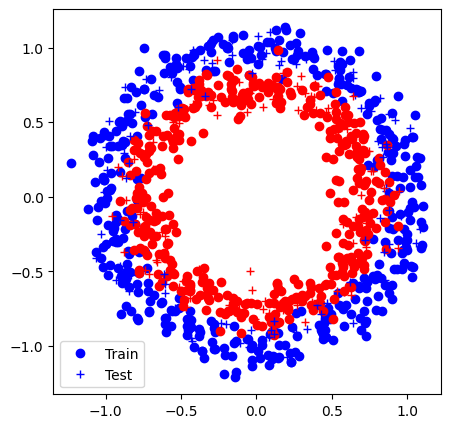

In [13]:
# charger / préparer / visualiser les données pour apprentissage
data = CirclesData()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
plot_data(data)

##### **Mise à jour de la fonction `init_params` :**

In [ ]:
def init_params(nx, nh, ny):
    """
    nx, nh, ny: des nombres entiers
    out params: dictionnaire des paramètres
    """
    params = {}
    moyenne = 0.0
    ecart_type = 0.3

    #####################
    ## Votre code ici  ##
    #####################
    # remplir avec les paramètres Wh, Wy, bh, by
    # activer l'autograd sur les poids du réseau

    params["Wh"] = None
    params["Wy"] = None
    params["bh"] = None
    params["by"] = None

    return params

Les deux fonctions `forward` et `loss_accuracy` sont inchangées par rapport à la partie précédente.

---

La fonction `backward` n'est plus utilisée grâce à l'autograd.

In [ ]:
def forward(params, X):
    """
    - In    :
    params  : dictionnaire des parametres
    X       : batch d'entrée (n_batch, dimension)
    - Out   :
    yhat    : sortie du réseau Ŷ (prédiction)
    outputs : dictionnaire des étapes intermédiaires et la sortie Ŷ du réseau.
    """
    
    outputs = {}

    #####################
    ## Votre code ici  ##
    #####################

    outputs["X"] = None
    outputs["htilde"] = None
    outputs["h"] = None
    outputs["ytilde"] = None
    outputs["yhat"] = None

    return outputs['yhat'], outputs

In [ ]:
def loss_accuracy(Yhat, Y):
    """
    - In    :
    Yhat    :
    Y       :
    - Out   :
    L       :
    acc     :
    """

    L=acc=None
    
    #####################
    ## Votre code ici  ##
    #####################
    
    return L, acc

##### **Mise à jour de la fonction `sgd` :**

In [ ]:
def sgd(params, eta):

    #####################
    ## Votre code ici  ##
    #####################
    # mettre à jour le contenu de params
    # attention à bien utiliser torch.no_grad()
    # et à remettre les accumulateurs de gradients à zéro
            
    return params

##### **Mise à jour de l'algorithme global :**

In [ ]:
#initialisation des params
eta = 0.03
params = init_params(nx, nh, ny)

# epoch
curves = [[], [], [], [], [], []]
for iteration in range(200):

    # permutations
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #initialisation loss et acc par bacth
    Loss=[]
    Acc=[]

    for j in range(N // Nbatch):
        
        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]

        #####################
        ## Votre code ici  ##
        #####################
        # écrire l'algorithme d'apprentissage sur le batch (X,Y)
        # en utilisant les fonctions forward, loss_accuracy, sgd
        # calculer les gradients avec la fonction backward de l'autograd
    
    # accummulation de la loss et des accuracy par batch  
    LBatch = sum(Loss)/len(Loss)
    accBatch = sum(Acc)/len(Acc)
    
    # ou bien calculer sur la dataset d'entrainement entière
    Yhat_train, _ = forward(params, data.Xtrain)
    Ltrain, acctrain = loss_accuracy(Yhat_train, data.Ytrain)

    Yhat_test, _ = forward(params, data.Xtest)
    Ltest, acctest = loss_accuracy(Yhat_test, data.Ytest)
    
    if iteration % 20 == 0 :
        title = f'\n Iter {iteration}: Acc. train {acctrain:.1f}% ({Ltrain:.2f}), Acc. test {acctest:.1f}% ({Ltest:.2f})'
        Ygrid, _ = forward(params, data.Xgrid)
        plot_data_with_grid(data,Ygrid.detach().numpy(), title)

    curves[0].append(accBatch)
    curves[1].append(acctrain)
    curves[2].append(acctest)

    curves[3].append(LBatch.detach().numpy())
    curves[4].append(Ltrain.detach().numpy())
    curves[5].append(Ltest.detach().numpy())


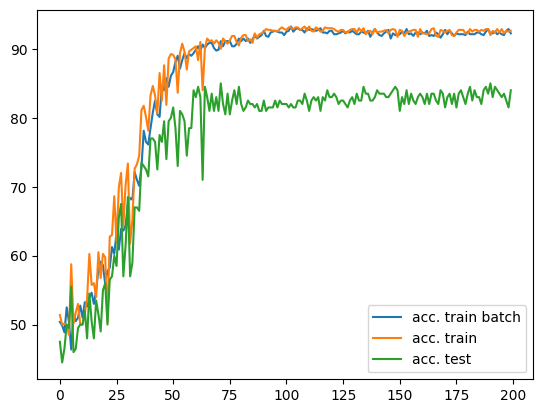

In [19]:
fig = plt.figure()
plt.plot(curves[0], label="acc. train batch")
plt.plot(curves[1], label="acc. train")
plt.plot(curves[2], label="acc. test")
plt.legend()
plt.show()

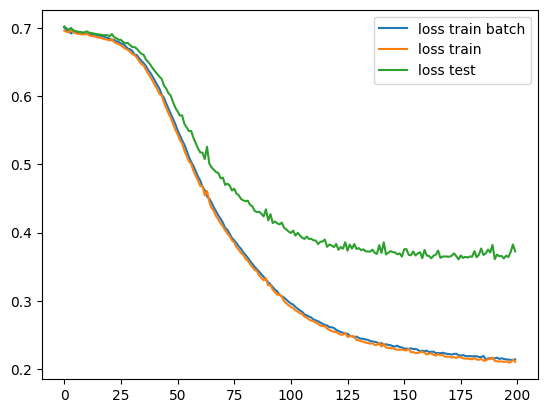

In [20]:
fig = plt.figure()
plt.plot(curves[3], label="loss train batch")
plt.plot(curves[4], label="loss train")
plt.plot(curves[5], label="loss test")

plt.legend()
plt.show()